# Bigmart Sale Prediction
## Loading Packages

In [1]:
#Initializing Packages and Importing Data
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import re
import random
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import sklearn.metrics


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Loading Data

In [3]:
df_train=pd.read_csv("Train.csv")

In [4]:
df_test=pd.read_csv("Test.csv")

In [5]:
#speedy-look for Train-Data
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Glipse for Test-Data
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# count data


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [8]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


# Understanding Dataset properties
Item_Identifier - Unique product ID

Item_Weight - Weight of product

Item_Fat_Content - Checks the Concentration of fat in the product

Item_Visibility - The % of total display area of all similar products in a store

Item_Type - Product Category

Item_MRP - Maximum Retail Price for a Product

Outlet_Identifier - Store ID

Outlet_Establishment_Year - The year in which store was established

Outlet_Size - The size of the store (Area Size Category)

Outlet_Location_Type - In Terms of city Tiers (Size)

Outlet_Type - Grocery store or a type of supermarket

Item_Outlet_Sales - Sales of the product In the Specific outlet

In [9]:
#notice that I use .T attribute stands for transpose. 
#Calling T on a DataFrame switches the rows and columns of the DataFrame.
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [11]:
a='\n###################################\n'
print(df_train.isnull().sum(),a,df_test.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 
###################################
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


# Check for duplicates

In [12]:
#Check for duplicates
idsUnique = len(set(df_train.Item_Identifier))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


In [13]:
df_train.shape , df_test.shape

((8523, 12), (5681, 11))

# Exploratory Data Analysis (EDA)


# Univariate Distribution

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

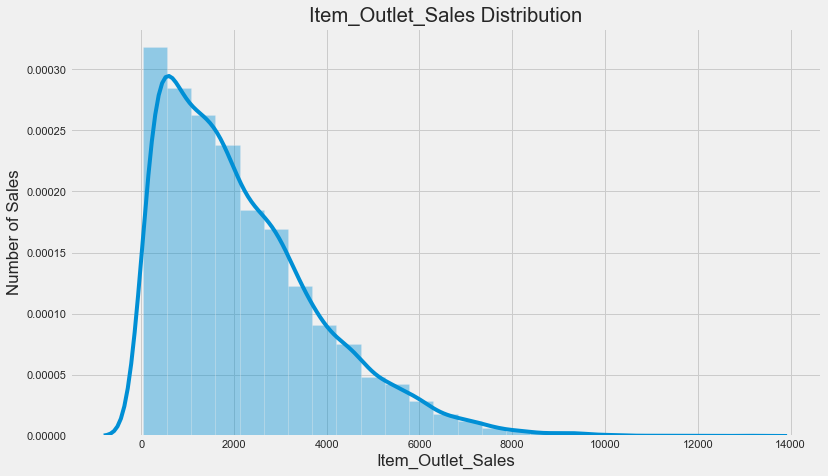

In [14]:
# Univariate Distribution
#Distribution of the target variable : Item_Outlet_Sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df_train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [15]:
print ("Skew is:", df_train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df_train.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


In [16]:
# Numerical Variables
numeric_features = df_train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [17]:
numeric_features.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [18]:
#correlaction matrix
corr = numeric_features.corr()
print (corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


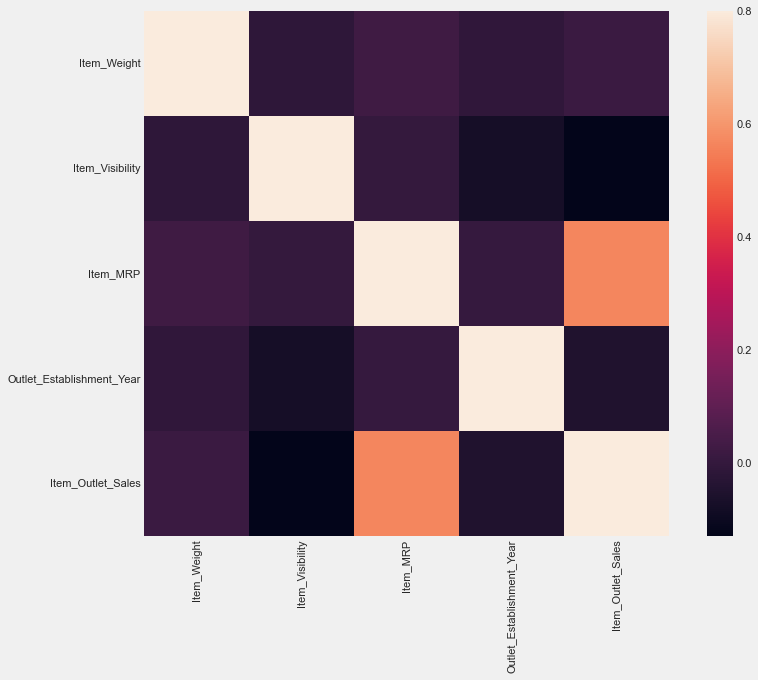

In [19]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [20]:
# Categorical Variables
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

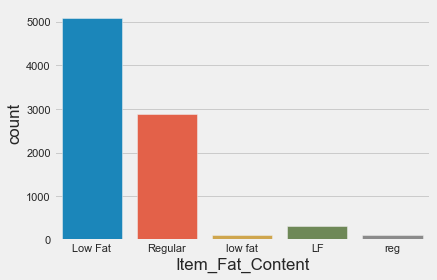

In [21]:
sns.countplot(df_train.Item_Fat_Content)

In [22]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

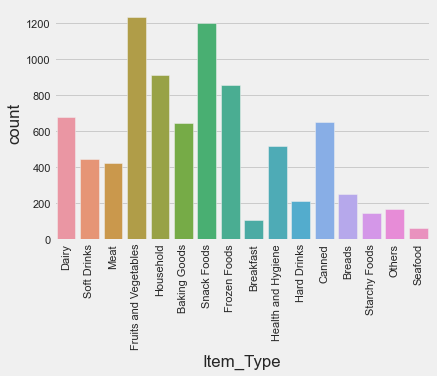

In [23]:
#Distribution of IteM_type
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

In [24]:
#Distribution of the Outlet_Size
df_train.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

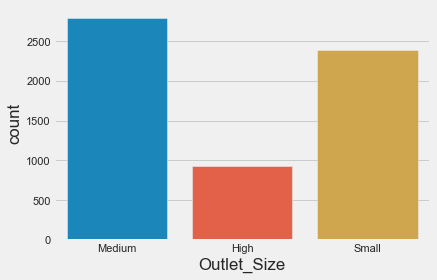

In [25]:
sns.countplot(df_train.Outlet_Size)


In [26]:
#Distribution of the Outlet_Location
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

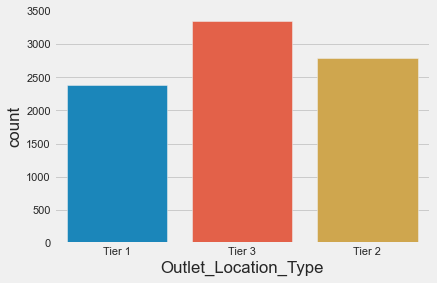

In [27]:
sns.countplot(df_train.Outlet_Location_Type)


In [28]:
#Distribution of the Outlet_Type
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

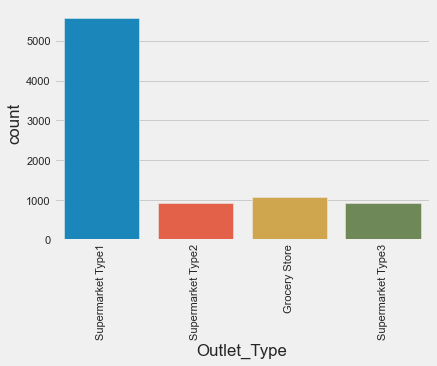

In [29]:
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=90)

# Bivariate Distribution


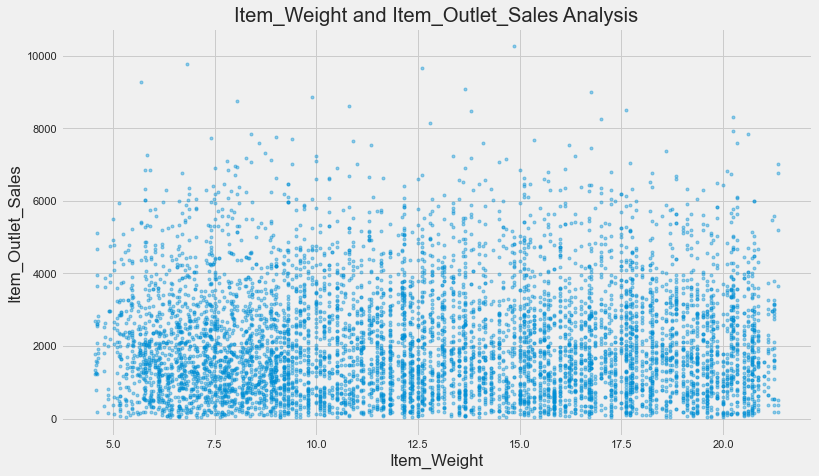

In [30]:
#Bivariate Distribution
#Numerical Variables

plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(df_train.Item_Weight, df_train["Item_Outlet_Sales"],'.', alpha = 0.4)

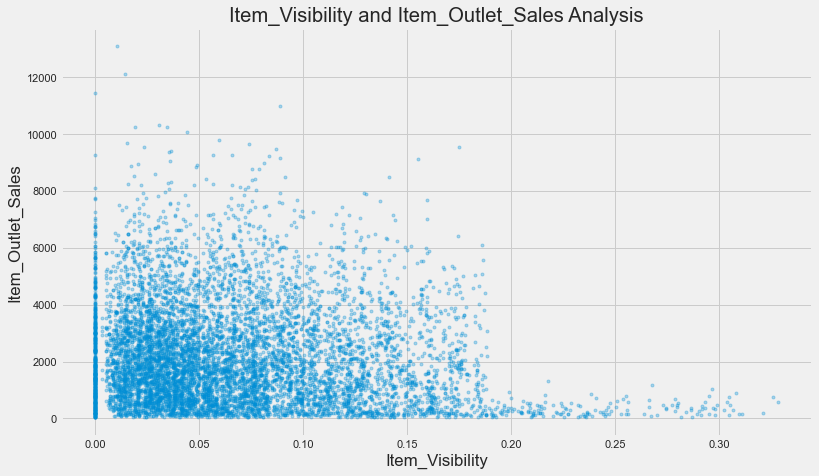

In [31]:
# Item_Visibility and Item_Outlet_Sales Analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(df_train.Item_Visibility, df_train["Item_Outlet_Sales"],'.', alpha = 0.3)

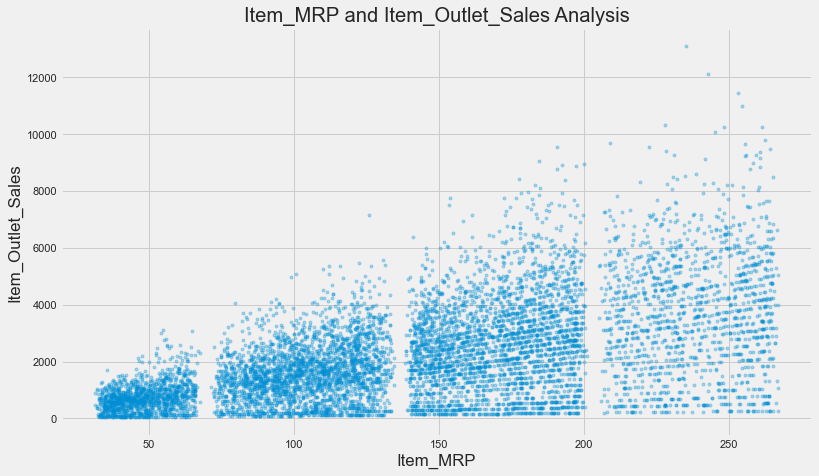

In [32]:
# Item_MRP and Item_Outlet_Sales Analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(df_train.Item_MRP, df_train["Item_Outlet_Sales"],'.', alpha = 0.3)

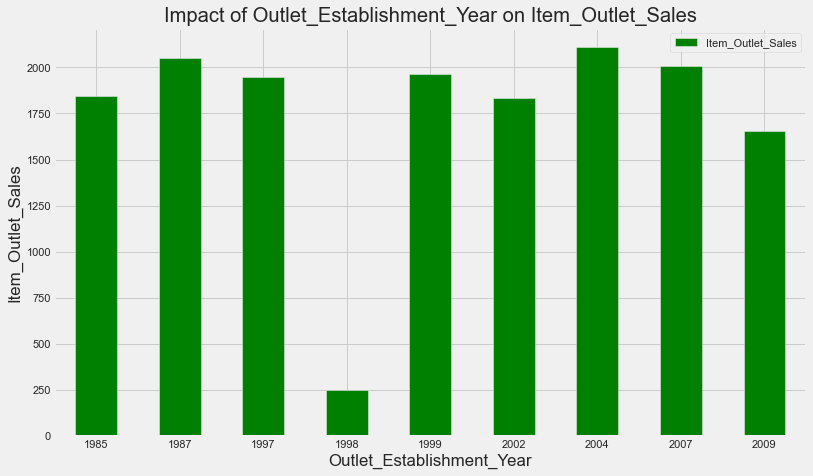

In [33]:
# Impact of Outlet_Establishment_Year on Item_Outlet_Sales
Outlet_Establishment_Year_pivot = \
df_train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [34]:
#  Categorial Variables
numeric_features = df_train.select_dtypes(include=[np.object])
numeric_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

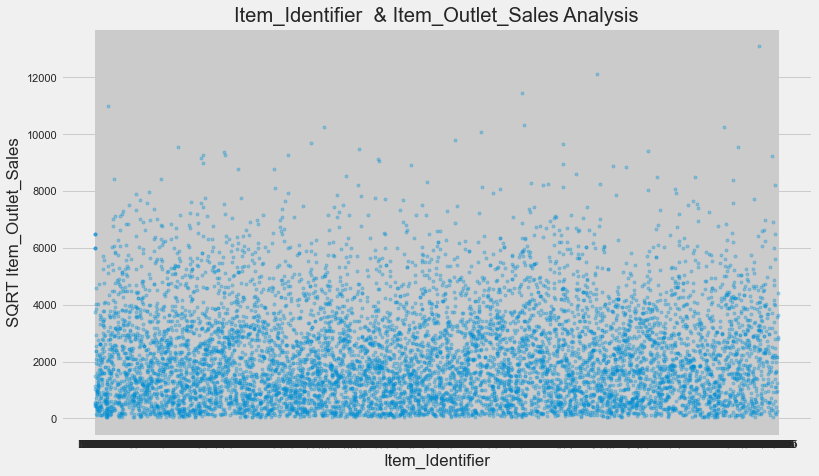

In [35]:
# Item_Identifier  & Item_Outlet_Sales Analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  & Item_Outlet_Sales Analysis")
plt.plot(df_train.Item_Identifier , df_train["Item_Outlet_Sales"],'.', alpha = 0.3)

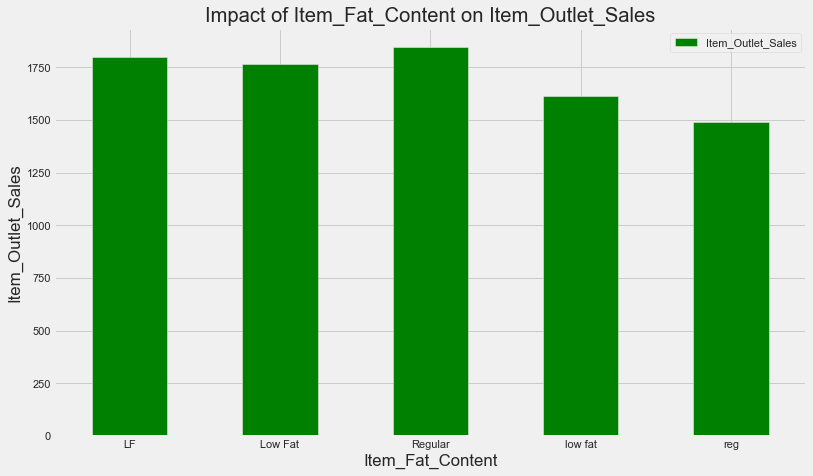

In [36]:
# Impact of Item_Fat_Content on Item_Outlet_Sales
Item_Fat_Content_pivot = \
df_train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

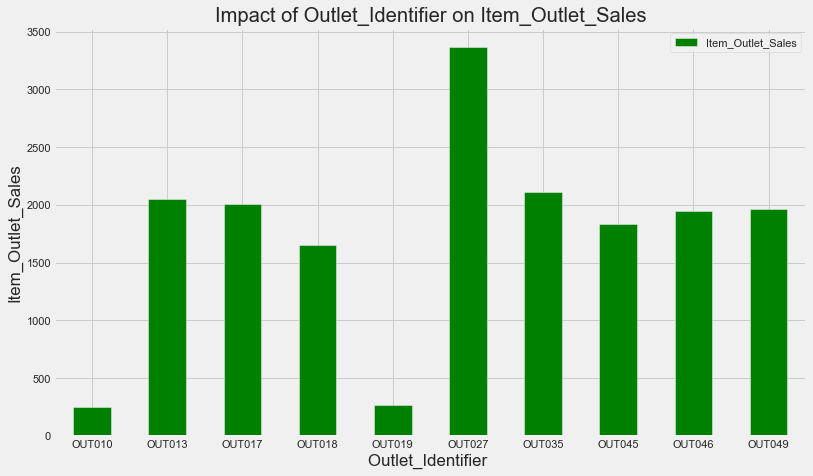

In [37]:
# Impact of Outlet_Identifier on Item_Outlet_Sales
Outlet_Identifier_pivot = \
df_train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


In [38]:
df_train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())


Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [39]:
df_train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())


Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


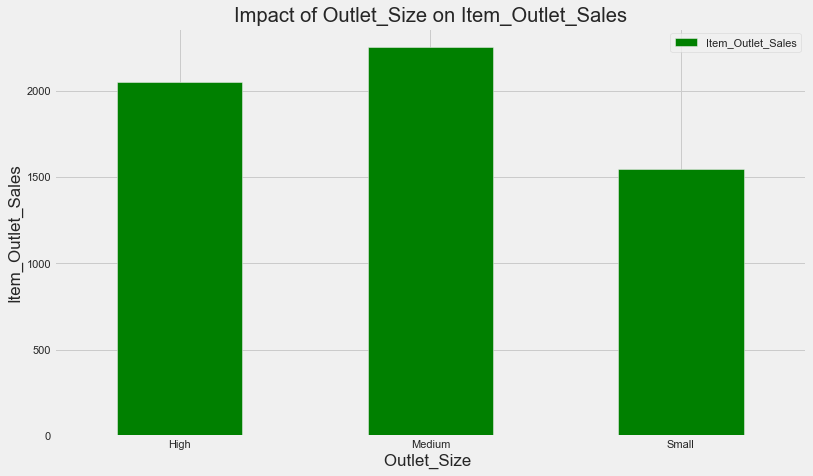

In [40]:
#  Impact of Outlet_Size on Item_Outlet_Sales
Outlet_Size_pivot = \
df_train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Size_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

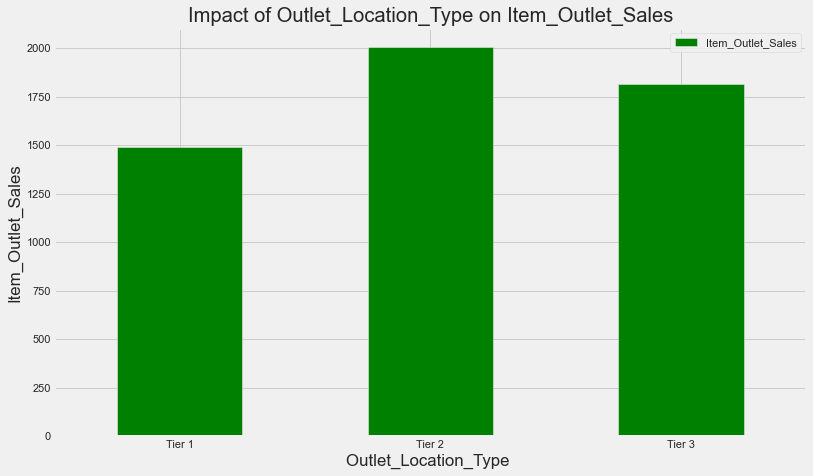

In [41]:
# Impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = \
df_train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Location_Type_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [42]:
df_train.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


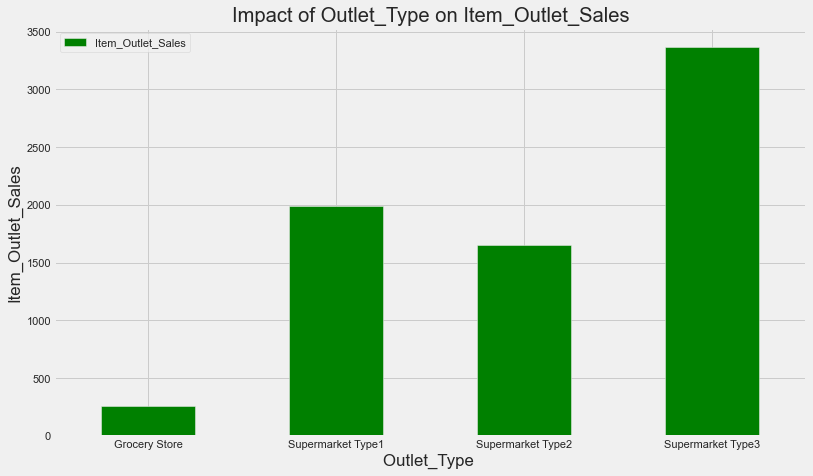

In [43]:
# Impact of Outlet_Type on Item_Outlet_Sales
Outlet_Type_pivot = \
df_train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

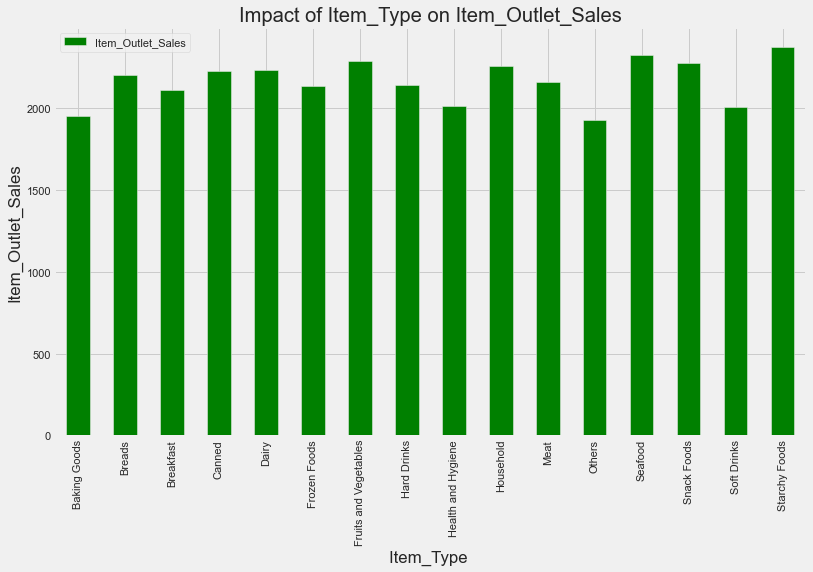

In [44]:
# Impact of Item_Type on Item_Outlet_Sales
pivoTable = \
df_train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)
pivoTable.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

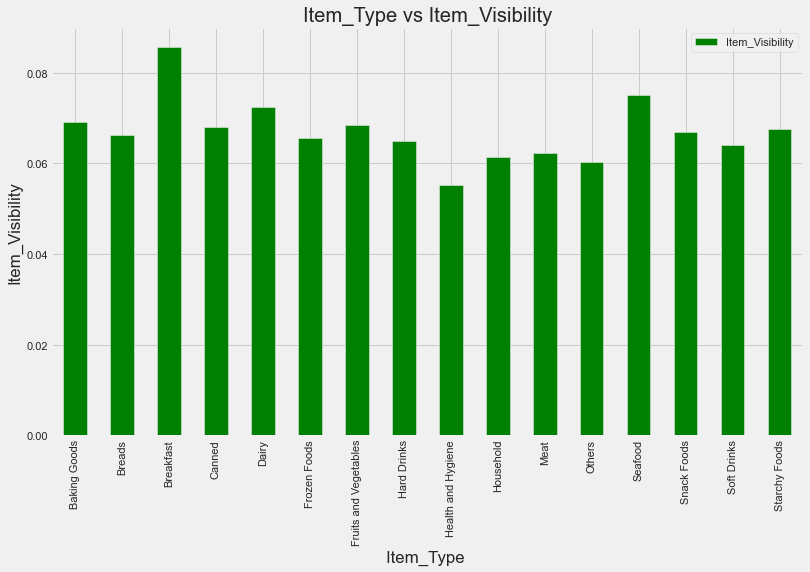

In [45]:
# Item_Type Vs. Item_Visibility
pivoTable = \
df_train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

The following steps are taken in this phase - 


*   Handling Missing Values
*   Handle Irregular Values
*   Shuffling both dataframes


We have seen that the variables "Item Weight" and "Outlet Size" have missing values.

Item Weight is Continuous in nature.

Outlet size is Categorical in nature.

So we fill them by mean and mode respectively.

In [46]:
# Data Pre-Processing
# Join Train and Test Dataset
df_train['source']='train'
df_test['source']='test'

data = pd.concat([df_train,df_test], ignore_index = True)
data.to_csv("data.csv",index=False)
print(df_train.shape, df_test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [47]:
# df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [48]:
# df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [49]:
Outlet_size_mode_train = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [50]:
# missing_values_train = df_train['Outlet_Size'].isnull()   

In [51]:
# df_train.loc[missing_values_train, 'Outlet_Size'] = df_train.loc[missing_values_train,'Outlet_Type'].apply(lambda x: Outlet_size_mode_train[x])

In [52]:
# Outlet_size_mode_test = df_test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [53]:
# missing_values_test = df_test['Outlet_Size'].isnull()   

In [54]:
# df_test.loc[missing_values_test, 'Outlet_Size'] = df_test.loc[missing_values_test,'Outlet_Type'].apply(lambda x: Outlet_size_mode_test[x])

In [55]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [56]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64

In [57]:
missing_values = df_train.isnull().sum()
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64


In [58]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [59]:
#function to impute item_weight coulmn
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [60]:
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [61]:
missing_values = df_test.isnull().sum()
print(missing_values)
df_test.shape

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64


(5681, 12)

In [62]:
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [63]:
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

# Feature Engineering


In [64]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
df_train.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [65]:
# #introduce a feature of Outlet_Age from Outlet_Establisment_Year to make more use from this variable.
# df_train['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2013 - year)
# df_test['Outlet_Age']= df_test['Outlet_Establishment_Year'].apply(lambda year: 2013 - year)

In [66]:
# df_train['Outlet_Age'].head()

In [67]:
# df_test['Outlet_Age'].head()

In [68]:
# df_train = df_train.sample(frac=1).reset_index(drop=True)

In [69]:
# df_test = df_test.sample(frac=1).reset_index(drop=True)

In [70]:
# le = LabelEncoder()
# variables = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

# for i in variables:
#     df_train[i] = le.fit_transform(df_train[i])
    
# for i in variables:
#     df_test[i] = le.fit_transform(df_test[i])

In [71]:
# df_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [72]:
# df_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [73]:
# X_new = df_train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
# Y_new = df_train['Item_Outlet_Sales']

In [74]:
# X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y_new,test_size=0.4,random_state=22)

In [75]:
# lr = LinearRegression()
# lr.fit(X_train,Y_train)
# Y_pred_lr = lr.predict(X_test)

In [76]:
# r2_lr = sklearn.metrics.r2_score(Y_test,Y_pred_lr)
# print("The R2 Score is : ", r2_lr)
# mae_lr = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_lr)
# print("The MAE is : ", mae_lr)
# mse_lr = sklearn.metrics.mean_squared_error(Y_test,Y_pred_lr)
# print("The MSE is : ",mse_lr)
# rmse_lr = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_lr))
# print("The RMSE is : ", rmse_lr)
# train_accuracy = lr.score(X_train,Y_train)
# print("Accuracy on training data: {:.2f}".format(train_accuracy))

In [77]:
# dc = DecisionTreeRegressor()
# dc.fit(X_train,Y_train)
# Y_pred_dc = dc.predict(X_test)

In [78]:
# r2_dc = sklearn.metrics.r2_score(Y_test,Y_pred_dc)
# print("The R2 Score is : ", r2_dc)
# mae_dc = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_dc)
# print("The MAE is : ", mae_dc)
# mse_dc = sklearn.metrics.mean_squared_error(Y_test,Y_pred_dc)
# print("The MSE is : ",mse_dc)
# rmse_dc = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_dc))
# print("The RMSE is : ", rmse_dc)

In [79]:
# rf = RandomForestRegressor()
# rf.fit(X_train,Y_train)
# Y_pred_rf = rf.predict(X_test)

In [80]:
# r2_rf = sklearn.metrics.r2_score(Y_test,Y_pred_rf)
# print("The R2 Score is : ", r2_rf)
# mae_rf = sklearn.metrics.mean_absolute_error(Y_test,Y_pred_rf)
# print("The MAE is : ", mae_rf)
# mse_rf = sklearn.metrics.mean_squared_error(Y_test,Y_pred_rf)
# print("The MSE is : ",mse_rf)
# rmse_rf = sqrt(sklearn.metrics.mean_squared_error(Y_test,Y_pred_rf))
# print("The RMSE is : ", rmse_rf)

In [81]:
# _scores = [r2_lr,r2_dc,r2_rf]
# mae_scores = [mae_lr,mae_dc,mae_rf]
# mse_scores = [mse_lr,mse_dc,mse_rf]
# rmse_scores = [rmse_lr,rmse_dc,rmse_rf]
# score_names=['LR','DC','RF']
# plt.figure(figsize=(10,8))
# sns.barplot(score_names,r2_scores, palette = 'mako')
# plt.title("R2 Model Scores")
# plt.show()r2

In [82]:
# plt.figure(figsize=(10,8))
# sns.barplot(score_names,mae_scores, palette = 'mako')
# plt.title("MAE Model Scores")
# plt.show()

In [83]:
# plt.figure(figsize=(10,8))
# sns.barplot(score_names,mse_scores, palette = 'mako')
# plt.title("MSE Model Scores")
# plt.show()

In [84]:
# plt.figure(figsize=(10,8))
# sns.barplot(score_names,rmse_scores, palette = 'mako')
# plt.title("RMSE Model Scores")
# plt.show()

In [85]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [86]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [87]:
missing_values_for_data_csv = data.isnull().sum()
print(missing_values)


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64


In [88]:
df_test.shape

(5681, 12)

In [89]:
#Creates pivot table with Outlet_Type and the mean of Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [90]:
#Get all Item_Visibility mean values for respective Item_Identifier
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [91]:
#function to fill all zeros in item_visiablity
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 879
Final #zeros: 0


In [92]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

# Handle Irregular Values 

In [93]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [94]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [95]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [96]:
data['Item_Fat_Content'].value_counts().sum()

14204

In [97]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

# LABEL ENCODING

In [98]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

# Dummy Variable

In [99]:
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [100]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [101]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [102]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=15, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 25.17 | Min - 1095 | Max - 1182


<AxesSubplot:title={'center':'Model Coefficients'}>

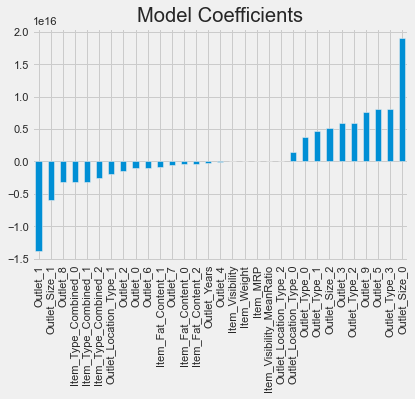

In [103]:
from sklearn.linear_model import LinearRegression
# x= df_train[predictors]
# Y = df_train['Item_Outlet_Sales']
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LinearRegression.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [104]:
X= np.array(train_df[predictors])
Y=np.array(train_df[target])
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=20)
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_train=lin_reg.predict(x_train)
y_pred_train
print("Train accuracy=",lin_reg.score(x_train,y_train))
print("Test  accuracy=",lin_reg.score(x_test,y_test))
X_Test=np.array(test_df[predictors])
y_pred_test=lin_reg.predict(X_Test)
print (y_pred_test)

Train accuracy= 0.561932985871192
Test  accuracy= 0.568614503557648
[1863.12505086 1590.02449993 1921.16969304 ... 1841.9035834  3558.2971745
 1281.14683168]



Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 25.17 | Min - 1095 | Max - 1182
Accuracy on training data: 0.56
test_accuracy= 1.0


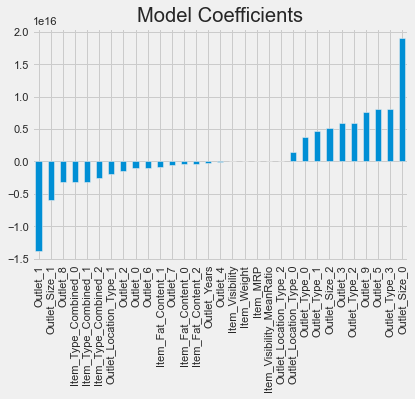

In [105]:
from sklearn.linear_model import LinearRegression

# Instantiate the model and select the predictor variables
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])

# Fit the model and plot the coefficients
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LinearRegression1.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

# Compute and print the accuracy on the training data
train_X = train_df[predictors]
train_y = train_df['Item_Outlet_Sales']
train_accuracy = LR.score(train_X, train_y)
print("Accuracy on training data: {:.2f}".format(train_accuracy))
test_x= test_df[predictors]
test_y=test_df['Item_Outlet_Sales']
print("test_accuracy=" ,LR.score(test_x, test_y))




Model Report
RMSE : 1129
CV Score : Mean - 1131 | Std - 26.81 | Min - 1098 | Max - 1186


<AxesSubplot:title={'center':'Model Coefficients'}>

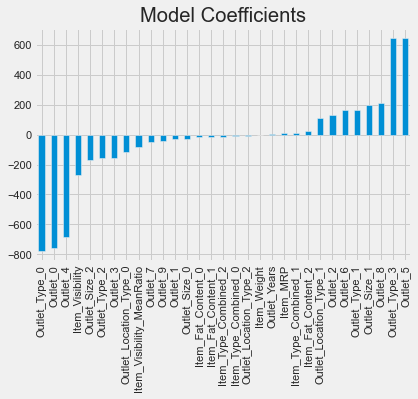

In [106]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RidgeRegressor.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1058
CV Score : Mean - 1092 | Std - 21.34 | Min - 1051 | Max - 1138


<AxesSubplot:title={'center':'Feature Importances'}>

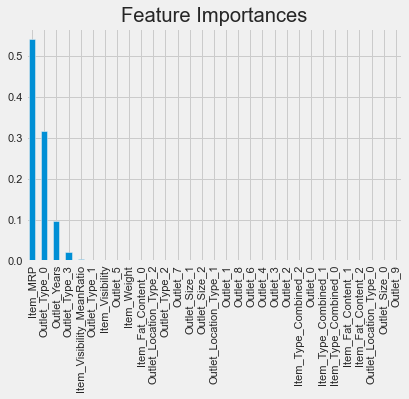

In [107]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DecisionTreeRegressor.csv')
coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 1069
CV Score : Mean - 1098 | Std - 21.75 | Min - 1060 | Max - 1141


<AxesSubplot:title={'center':'Feature Importances'}>

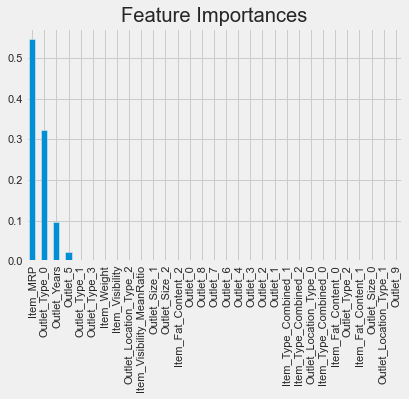

In [108]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RandomForest.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [109]:
from xgboost import XGBRegressor
n=np.array(test_df[predictors])
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.057)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=20, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)
print(my_model.score(train_df[predictors], train_df[target]))
print(my_model.score(test_df[predictors], test_df[target]))

0.6604250630946737
0.9728675867512947


In [110]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [111]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 138.69021083701773
RMSE : 994.4


In [112]:
IDcol.append(target)
submission= pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGboost.csv", index=False)

In [113]:
X= np.array(train_df[predictors])
y=np.array(train_df[target])

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [115]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [116]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train,y_train)

In [117]:
y_pred_dt = regressor.predict(X_test)#Accuracy
print('Mean-squared-error:', sklearn.metrics.mean_squared_error(y_test,y_pred_dt))

Mean-squared-error: 2526485.364252637
